In [1]:
import csv
from miniml.minisvm import *

# Algebraic Method

## Run code to calculate lambda, miu, w*, w0, check KKT

In [2]:
z1, z2, z3 = 1.0, 1.0, -1.0
u1 = np.array([1, 2])
u2 = np.array([2, 1])
u3 = np.array([0, 1.5])

z = [z1, z2, z3]
u = [u1, u2, u3]

svc_ds3 = AlgebraicSVC(z=z, u=u, b=1)

(1) Use NumPy to invert matrix, and to calculate lambda and µ. 


In [3]:
lambda_, miu = svc_ds3.calc_lambda_miu()
print(f"Lambda = {[round(per, 4) for per in lambda_]}, miu = {miu:.4f}")

Lambda = [2.2222, -0.4444, 1.7778], miu = 3.0000


(2) Check lambda satisfies the KKT conditions involving lambda (but not involving w) that stated in Problem 1(c)(ii). 


In [4]:
result = svc_ds3.check_KKT_lambda()
print(f"Lambda{' does not' if not result else ''} satisfies KKT conditions")

[Check Error] Lambda -0.4444444444444453 is less than zero!!!
Lambda does not satisfies KKT conditions


(3) Calculate the optimal (nonaugmented) weight vector w∗ by using result from Problem 1(c)(i). To find the optimal bias term w0 using one of the KKT conditions from Problem 1(b). 


In [5]:
opt_w, opt_w0 = svc_ds3.calc_w_w0()
print(f"Optimal w = {[round(per, 4) for per in opt_w]}, optimal w0 = {opt_w0:.4f}")

Optimal w = [1.3333, 1.3333], optimal w0 = -3.0000


(4) Check that the resulting w and w0 satisfy the KKT conditions of Pr. 1(c). 


In [6]:
result = svc_ds3.check_KKT_w_w0()
print(f"W or w0{' does not' if not result else ''} satisfy KKT conditions")

W or w0 satisfy KKT conditions


## Plot in 2D nonaugmented feature (u) space

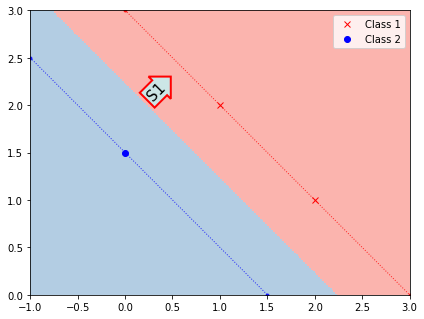

In [7]:
fig = svc_ds3.plot()
fig.savefig('./imgs/algebra1.png')

**Now, change the lambda 1 to zero by hand, and re-optimize other parameters**

In [8]:
lambda_, miu = svc_ds3.calc_lambda_miu_with_zero_lambda(zeros=[1])
print(f"Lambda = {[round(per, 4) for per in lambda_]}, miu = {miu:.4f}")

Lambda = [1.6, 0.0, 1.6], miu = 2.2000


In [9]:
result = svc_ds3.check_KKT_lambda()
print(f"Lambda{' does not' if not result else ''} satisfies KKT conditions")

Lambda satisfies KKT conditions


In [10]:
opt_w, opt_w0 = svc_ds3.calc_w_w0()
print(f"Optimal w = {[round(per, 4) for per in opt_w]}, optimal w0 = {opt_w0:.4f}")

Optimal w = [1.6, 0.8], optimal w0 = -2.2000


In [11]:
result = svc_ds3.check_KKT_w_w0()
print(f"W or w0{' does not' if not result else ''} satisfy KKT conditions")

W or w0 satisfy KKT conditions


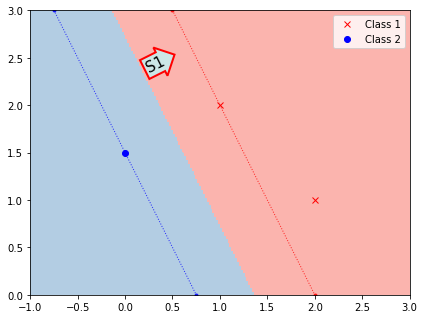

In [12]:
fig = svc_ds3.plot()
fig.savefig('./imgs/algebra2.png')

# SMO (Sequential Minimal Optimization)

In [13]:
z1, z2, z3 = 1.0, 1.0, -1.0
u1 = np.array([1, 2])
u2 = np.array([2, 1])
u3 = np.array([0, 1.5])

z = [z1, z2, z3]
u = [u1, u2, u3]

svc_smo = SMoSVC(z=z, u=u, b=1)

If we limit C to 1.0, lambda cannot go larger, which would lead to not satisfying KKT of W

In [14]:
params = svc_smo.fit(C=2.0, epsilon=0.0001)

KKT Satisfied!


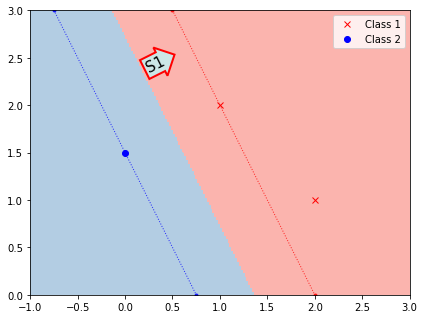

In [15]:
fig = svc_smo.plot()
fig.savefig('./imgs/SMO1.png')

**Linear Case**

In [16]:
num = 20

z1 = [-1 for i in range(num)]
z2 = [1 for i in range(num)]
u1 = [[round(random.uniform(0, 10),2), round(random.uniform(0, 10), 2)] for i in range(num)]
u2 = [[round(random.uniform(10, 20),2), round(random.uniform(10, 20), 2)] for i in range(num)]

z = z1 + z2
u = u1 + u2

svc_linear = SMoSVC(z=z, u=u, b=1)

In [17]:
params = svc_linear.fit(max_epoch=300, kernel='linear', C=4.0, epsilon=0.0001)

KKT Satisfied!


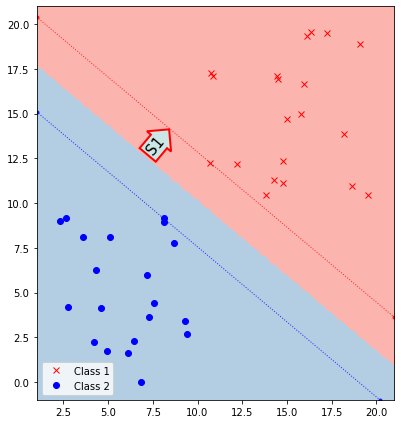

In [18]:
fig = svc_linear.plot()
fig.savefig('./imgs/SMO2_linearly_separable.png')

In [19]:
num = 20

z1 = [-1 for i in range(num)]
z2 = [1 for i in range(num)]
u1 = [[round(random.uniform(0, 13),2), round(random.uniform(0, 13), 2)] for i in range(num)]
u2 = [[round(random.uniform(7, 20),2), round(random.uniform(7, 20), 2)] for i in range(num)]

z = z1 + z2
u = u1 + u2

svc_linear = SMoSVC(z=z, u=u, b=1)

In [20]:
params = svc_linear.fit(max_epoch=300, kernel='linear', C=4, epsilon=0.0001)

Last 200 Epochs
Last 100 Epochs


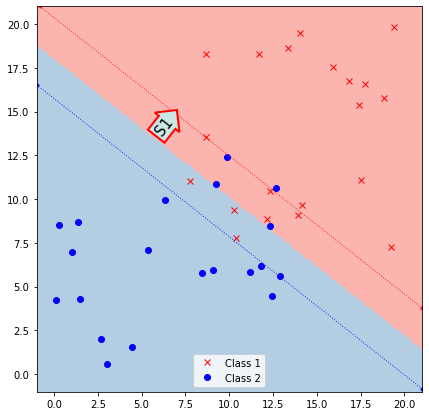

In [21]:
fig = svc_linear.plot()
fig.savefig('./imgs/SMO2_not_linearly_separable.png')

**Quadratic Case**

In [22]:
z = []
u = []
with open('./XOR.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in list(spamreader)[1:]:
        x0, x1, label = map(float, row[0].split(','))
        u.append([x0,x1])
        z.append(1 if label == 1 else -1)

svc_quad = SMoSVC(z=z, u=u, b=1)

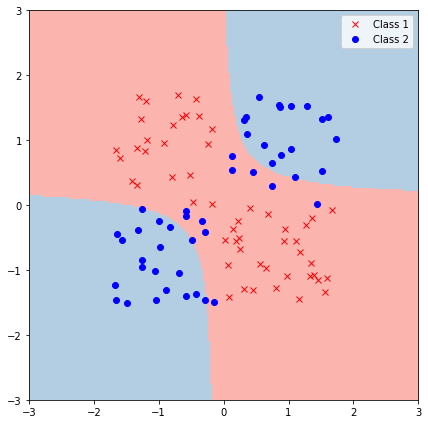

In [23]:
Ani = False
params = svc_quad.fit(max_epoch=10, kernel='quadratic', C=6, epsilon=0.0001, ani=Ani)
if Ani:
    svc_quad.fig.savefig('./imgs/SMO2_quadratic_xor.png')
else:
    fig = svc_quad.plot()
    fig.savefig('./imgs/SMO2_quadratic_xor.png')

**RBF Case**

In [24]:
z = []
u = []
with open('./XOR.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in list(spamreader)[1:]:
        x0, x1, label = map(float, row[0].split(','))
        u.append([x0,x1])
        z.append(1 if label == 1 else -1)

svc_rbf = SMoSVC(z=z, u=u, b=1)

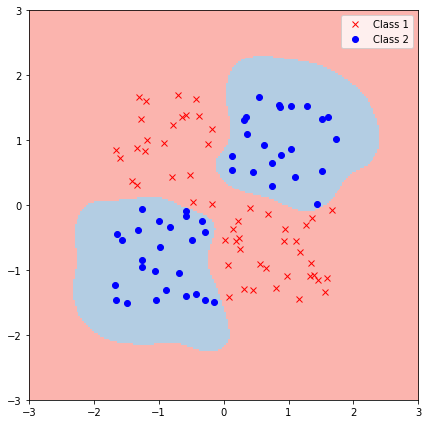

In [25]:
Ani = False
params = svc_rbf.fit(max_epoch=10, kernel='RBF', C=6.0, epsilon=0.0001, ani=Ani, gamma=6)
if Ani:
    svc_rbf.fig.savefig('./imgs/SMO2_RBF_xor.png')
else:
    fig = svc_rbf.plot()
    fig.savefig('./imgs/SMO2_RBF_xor.png')

**RBF Case - Spiral Dataset**

In [26]:
_file_data = np.loadtxt('./spiral.csv', delimiter=';', dtype=np.float32)

_file_data[_file_data[:,2]==1,2] = -1
_file_data[_file_data[:,2]==0,2] = 1

u = _file_data[:,0:2]
z = _file_data[:,2]

In [27]:
svc_challenge = SMoSVC(z=z, u=u, b=1)

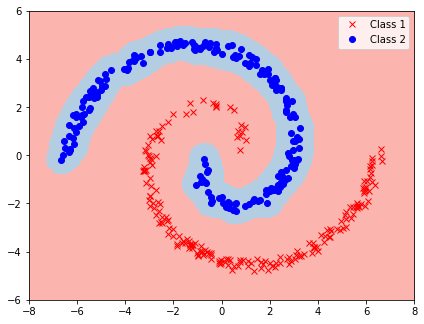

In [28]:
Ani = False
params = svc_challenge.fit(max_epoch=10, kernel='RBF', C=4.0, epsilon=0.0001, ani=Ani, gamma=6)
if Ani:
    svc_challenge.fig.savefig('./imgs/SMO2_RBF_Spiral.png')
else:
    fig = svc_challenge.plot()
    fig.savefig('./imgs/SMO2_RBF_Spiral.png')

**RBF Case - Circle Dataset**

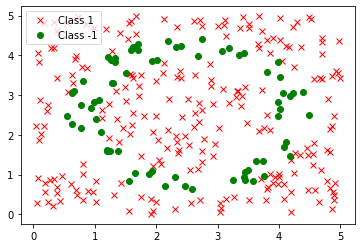

In [29]:
def getLabel(xy):
    x, y = xy
    if (x-2.5)*(x-2.5) + (y-2.5)*(y-2.5) < 2:
        return 1
    if (x-2.5)*(x-2.5) + (y-2.5)*(y-2.5) < 4:
        return -1
    return 1

u = []
z = []
for i in range(300):
    xy = [random.uniform(0, 5), random.uniform(0, 5)]
    u.append(xy)
    z.append(getLabel(xy))

def draw_datasets(title="", points=[], labels=[]):
    """helper function for datasets drawing"""
    colors = ['rx', 'go']
    for i in set(labels):
        plt.plot(points[labels==i, 0], 
                 points[labels==i, 1], 
                 colors[1 if i == -1 else 0], 
                 label=f'Class {i}')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()
draw_datasets(points=np.array(u), labels=np.array(z))

In [30]:
svc_circle = SMoSVC(z=z, u=u, b=1)

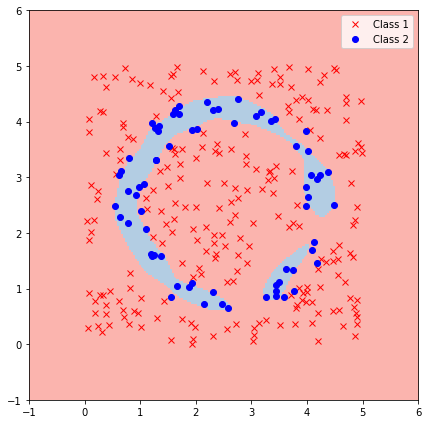

In [31]:
Ani = False
params = svc_circle.fit(max_epoch=10, kernel='RBF', C=4.0, epsilon=0.0001, ani=Ani, gamma=4)
if Ani:
    svc_circle.fig.savefig('./imgs/SMO2_RBF_Circle.png')
else:
    fig = svc_circle.plot()
    fig.savefig('./imgs/SMO2_RBF_Circle.png')

**Multi Classification (OvR + MVM, One vs. Rest + Maximum Value Method)**

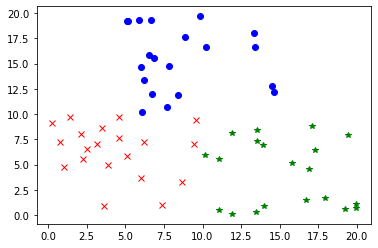

In [32]:
num = 20

z1 = [0 for i in range(num)]
z2 = [1 for i in range(num)]
z3 = [2 for i in range(num)]
u1 = [[round(random.uniform(0, 10),2), round(random.uniform(0, 10), 2)] for i in range(num)]
u2 = [[round(random.uniform(5, 15),2), round(random.uniform(10, 20), 2)] for i in range(num)]
u3 = [[round(random.uniform(10, 20),2), round(random.uniform(0, 10), 2)] for i in range(num)]

z = np.array(z1 + z2 + z3)
u = np.array(u1 + u2 + u3)

colors = ['rx', 'bo', 'g*']
for i in set(z):
    plt.plot(u[z==i, 0], 
             u[z==i, 1], 
             colors[i], 
             label=f'Class {i}')

In [33]:
multi_svc = MultiSVC(z, u)
params = multi_svc.fit(kernel='linear')

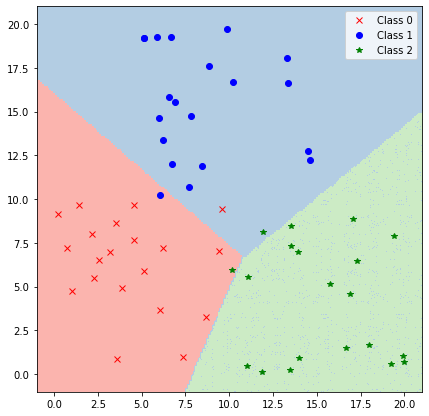

In [34]:
fig = multi_svc.plot()
fig.savefig('./imgs/MVM_linear.png')

**Multi Classification (Non-linear Case)**

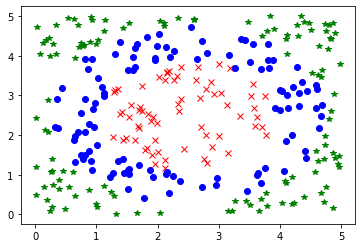

In [35]:
def getLabel(xy):
    x, y = xy
    if (x-2.5)*(x-2.5) + (y-2.5)*(y-2.5) < 2:
        return 0
    if (x-2.5)*(x-2.5) + (y-2.5)*(y-2.5) < 5:
        return 1
    return 2

u = []
z = []
for i in range(300):
    xy = [random.uniform(0, 5), random.uniform(0, 5)]
    u.append(xy)
    z.append(getLabel(xy))

z = np.array(z)
u = np.array(u)
    
colors = ['rx', 'bo', 'g*']
for i in set(z):
    plt.plot(u[z==i, 0], 
             u[z==i, 1], 
             colors[i], 
             label=f'Class {i}')

In [36]:
multi_svc = MultiSVC(z, u)
params = multi_svc.fit(kernel='quadratic')

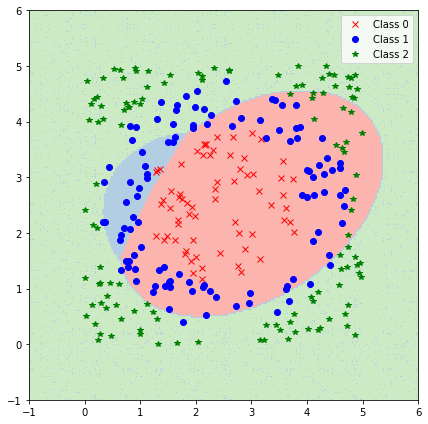

In [37]:
fig = multi_svc.plot()
fig.savefig('./imgs/MVM_quadratic.png')

In [38]:
params = multi_svc.fit(kernel='polynomial')

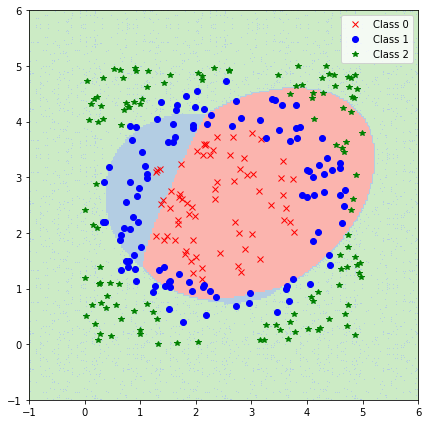

In [39]:
fig = multi_svc.plot()
fig.savefig('./imgs/MVM_poly.png')

In [40]:
params = multi_svc.fit(kernel='sigmoid')

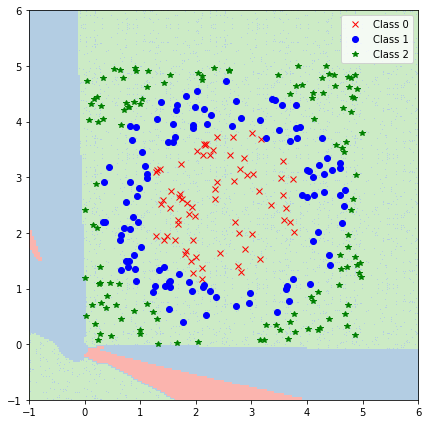

In [41]:
fig = multi_svc.plot()
fig.savefig('./imgs/MVM_sigmoid.png')

In [42]:
params = multi_svc.fit(kernel='RBF')

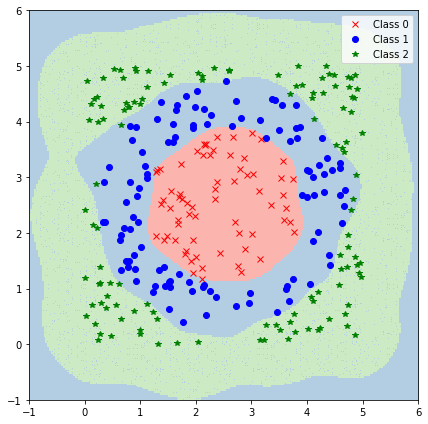

In [43]:
fig = multi_svc.plot()
fig.savefig('./imgs/MVM_RBF.png')